In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

In [6]:
# Function to read FITS file and extract image data
def read_fits_data(fits_file):
    with fits.open(fits_file) as hdul:
        image_data = hdul[0].data
    return image_data

# Directory containing the FITS files
directory = 'fowler/fs_2ramp_2sec_slow'

# List of FITS files for ramp 1 and ramp 2
fits_files_ramp1 = [os.path.join(directory, 'Frame_R0001_M0001_N0001.fits'), 
                    os.path.join(directory, 'Frame_R0001_M0002_N0001.fits')]
fits_files_ramp2 = [os.path.join(directory, 'Frame_R0002_M0001_N0001.fits'), 
                    os.path.join(directory, 'Frame_R0002_M0002_N0001.fits')]

# Exposure time for each image in seconds
exposure_time = 2.0

# Total acquisition time in seconds
total_acquisition_time = 2.625

# Calculate time points for each image in ramp 1 and ramp 2
# Assuming a small overhead time between ramps
overhead_time = (total_acquisition_time - 2 * exposure_time) / 2
time_points_ramp1 = [0, exposure_time]
time_points_ramp2 = [exposure_time + overhead_time, 2 * exposure_time + overhead_time]

# Initialize lists to store mean pixel values
mean_pixel_values_ramp1 = []
mean_pixel_values_ramp2 = []

# Read each FITS file for ramp 1 and extract data
for fits_file in fits_files_ramp1:
    image_data = read_fits_data(fits_file)
    mean_pixel_values_ramp1.append(np.mean(image_data))

# Read each FITS file for ramp 2 and extract data
for fits_file in fits_files_ramp2:
    image_data = read_fits_data(fits_file)
    mean_pixel_values_ramp2.append(np.mean(image_data))

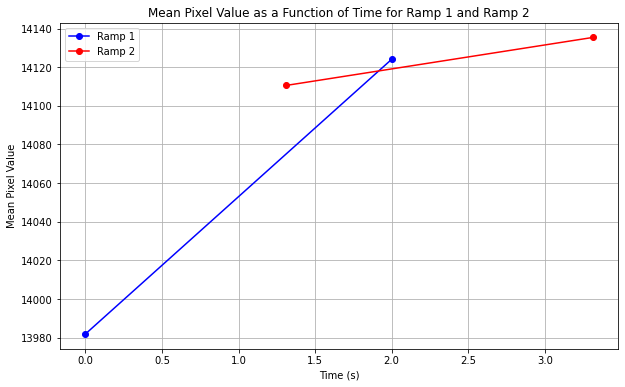

In [7]:
# Plot the mean pixel values as a function of time points for both ramps
plt.figure(figsize=(10, 6))
plt.plot(time_points_ramp1, mean_pixel_values_ramp1, marker='o', linestyle='-', color='b', label='Ramp 1')
plt.plot(time_points_ramp2, mean_pixel_values_ramp2, marker='o', linestyle='-', color='r', label='Ramp 2')
plt.xlabel('Time (s)')
plt.ylabel('Mean Pixel Value')
plt.title('Mean Pixel Value as a Function of Time for Ramp 1 and Ramp 2')
plt.legend()
plt.grid(True)
plt.show()